In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from pandas_datareader import data, wb
import datetime

/home/personal-arthur/.local/lib/python3.6/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
paperlist = pd.read_csv('../../../data/lab/papeis.csv')

In [3]:
paperlist.head()

,Papel,Empresa,Setor
0,EVEN3,Even ON NM,Construção e Engenharia
1,MILS3,MILLS ON NM,Construção e Engenharia
2,CESP5,CESP CIA ENERGETICA SAO PAULO PNA,Energia Elétrica
3,CESP6,CESP CIA ENERGETICA SAO PAULO PNB,Energia Elétrica
4,CESP3,CESP CIA ENERGETICA SAO PAULO ON,Energia Elétrica


In [4]:
paperlist.Setor.unique()

array(['Construção e Engenharia', 'Energia Elétrica', 'Comércio',
       'Tecidos. Vestuário e Calçados', 'Máquinas e Equipamentos'],
      dtype=object)

In [5]:
paper = paperlist.Papel.values.tolist()

In [6]:
mask =  paperlist['Setor'] ==  'Comércio'
df_setor_comercio = paperlist[mask]

In [7]:
df_setor_comercio.head()

,Papel,Empresa,Setor
5,BTOW3,B2W COMPANHIA GLOBAL DO VAREJO ON,Comércio
10,VVAR3,VIAVAREJO ON,Comércio
68,CGRA3,GRAZZIOTIN ON,Comércio
70,CGRA4,GRAZZIOTIN PN,Comércio
72,GUAR3,GUARARAPES CONFECÇÕES ON,Comércio


In [8]:
len(df_setor_comercio)

15

In [9]:
paper_comercio = df_setor_comercio.Papel.values.tolist()

In [10]:
len(paper), len(paper_comercio)

(134, 15)

In [11]:
str(paper[0]), str(paper_comercio[0])

('EVEN3', 'BTOW3')

In [12]:
start = datetime.datetime(2017, 1, 1)
end = datetime.datetime(2020, 2, 28)

#df_final = pd.DataFrame()

df_teste_demo = data.DataReader('BTOW3.SA', 'yahoo', start, end)

In [13]:
df_teste_demo.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-02,9.96202,9.71104,9.84618,9.84618,203146.0,9.84618
2017-01-03,10.23230,9.82687,9.85583,10.09720,802745.0,10.09720
2017-01-04,10.37710,10.06820,10.10680,10.32880,642797.0,10.32880
2017-01-05,10.84050,10.30950,10.37710,10.63770,1745031.0,10.63770
2017-01-06,10.57020,10.06820,10.57020,10.30950,644869.0,10.30950


In [14]:
df_teste_demo.Volume.sort_values(ascending=False)

Date
2018-11-30    21697491.0
2019-08-09    10266752.0
2017-10-18     8956977.0
2017-10-13     8036816.0
2019-09-10     8032600.0
                 ...    
2017-10-12           0.0
2017-09-07           0.0
2017-12-29           0.0
2017-05-29           0.0
2017-12-25           0.0
Name: Volume, Length: 785, dtype: float64

In [15]:
def osc(df):
    o = []
    o.append(None)
    for i in range(1,len(df)):
        if np.isnan(df[i]):
            o.append(None)
        else:
            o.append(100 * (1 - (df[i-1] / df[i])))
    return o


In [16]:
start = datetime.datetime(2017, 1, 1)
end = datetime.datetime(2020, 2, 28)

df_final_volume    = pd.DataFrame()
df_final_oscilacao = pd.DataFrame()

for p in tqdm(paper_comercio):
    
    df = data.DataReader(p+'.SA', 'yahoo', start, end)
    df['Oscilacao'] = osc(df.Close)
    #df.to_csv('data/diario/'+p+'.csv')
    
    df_m = df.resample('M').mean()
    #df_m.to_csv('data/mensal/'+p+'.csv')
    
    df_final_volume[p] = df.Volume
    df_final_oscilacao[p] = df.Oscilacao
    
    

100%|██████████| 15/15 [00:19<00:00,  1.30s/it]


In [17]:
df_final_volume.head()

,BTOW3,VVAR3,CGRA3,CGRA4,GUAR3,WLMM3,WLMM4,HYPE3,LLIS3,ARZZ3,LREN3,AMAR3,LAME3,MGLU3,LAME4
Date,,,,,,,,,,,,,,,
2017-01-02,203146.0,36000.0,900.0,4400.0,13600.0,NaN,700.0,1061500.0,485.0,60200.0,671066.0,35300.0,190702.0,4006400.0,1256186.0
2017-01-03,802745.0,31800.0,2200.0,2500.0,59200.0,NaN,400.0,6353500.0,3328.0,152800.0,2952521.0,50700.0,295734.0,3206400.0,8045353.0
2017-01-04,642797.0,2700.0,0.0,800.0,100000.0,NaN,10300.0,1474100.0,399.0,174300.0,2649900.0,29500.0,331848.0,6867200.0,2387747.0
2017-01-05,1745031.0,10900.0,0.0,7300.0,75200.0,NaN,17000.0,2362700.0,585.0,143100.0,3559215.0,38700.0,234340.0,6905600.0,2252486.0
2017-01-06,644869.0,1400.0,100.0,1600.0,188000.0,NaN,8400.0,1955900.0,3157.0,114500.0,2122219.0,7600.0,310882.0,1600000.0,1376095.0


In [18]:
df_final_oscilacao.describe()

,BTOW3,VVAR3,CGRA3,CGRA4,GUAR3,WLMM3,WLMM4,HYPE3,LLIS3,ARZZ3,LREN3,AMAR3,LAME3,MGLU3,LAME4
count,784.000000,784.000000,784.000000,784.000000,784.000000,656.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000
mean,0.180057,0.104887,0.044436,0.072223,0.148299,0.065335,0.203913,0.021487,-0.097278,0.086724,0.112163,0.050496,0.055934,0.382830,0.036391
std,3.311397,3.460345,2.151706,1.756154,2.132304,4.547402,3.471039,1.614890,2.937805,2.234956,1.922890,3.068635,1.965131,3.387178,2.201216
min,-16.026157,-18.224292,-8.425172,-7.619460,-13.524756,-73.054590,-15.336124,-6.845247,-19.753087,-12.500000,-9.696378,-19.548868,-14.171323,-19.378629,-18.124996
25%,-1.766043,-1.851231,-1.126297,-0.811304,-1.087822,0.000000,-0.743153,-0.905470,-1.408573,-1.230165,-1.037512,-1.655548,-0.888203,-1.382765,-1.197054
50%,0.087720,0.000000,0.000000,0.000000,0.088380,0.000000,0.000000,0.000000,-0.030907,0.000000,0.063758,0.000000,0.076046,0.241637,0.000000
75%,2.282317,1.996011,1.139058,0.990820,1.393377,0.000000,1.607247,0.972908,1.157382,1.340480,1.218647,1.809234,1.146410,2.144881,1.356215
max,15.073633,12.592591,7.066379,9.853568,9.035608,25.000000,22.116903,6.306852,14.422226,7.959999,7.825223,15.193799,8.164095,12.739932,7.128026


In [19]:
df_final_oscilacao.resample('M').mean().describe()

,BTOW3,VVAR3,CGRA3,CGRA4,GUAR3,WLMM3,WLMM4,HYPE3,LLIS3,ARZZ3,LREN3,AMAR3,LAME3,MGLU3,LAME4
count,38.000000,38.000000,38.000000,38.000000,38.000000,32.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,0.178011,0.104382,0.038861,0.066397,0.149480,0.064353,0.215124,0.015350,-0.099621,0.086711,0.110867,0.056312,0.058261,0.384405,0.035756
std,0.581158,0.819146,0.360295,0.350535,0.538736,1.126762,0.650547,0.309433,0.554165,0.415421,0.316888,0.720444,0.403583,0.744989,0.440902
min,-1.032218,-1.432613,-0.839107,-0.726677,-1.142185,-3.320663,-1.150032,-0.861824,-1.427468,-1.096323,-0.575446,-1.381156,-0.861857,-0.812682,-1.004102
25%,-0.179493,-0.479077,-0.160124,-0.143026,-0.162255,-0.424906,-0.161896,-0.179293,-0.337252,-0.105053,-0.063362,-0.492808,-0.148609,-0.034158,-0.252393
50%,0.191389,-0.003248,0.067291,0.087816,0.055226,0.000000,0.180693,0.030614,-0.129051,0.051210,0.148692,0.156681,0.129990,0.307460,0.076074
75%,0.583364,0.656635,0.254070,0.332465,0.549765,0.643716,0.555837,0.257253,0.255494,0.379137,0.312891,0.569102,0.275535,0.712321,0.352703
max,1.357423,1.832146,0.817199,0.706131,1.141365,2.520501,1.659780,0.426438,1.277199,0.876647,0.828236,1.336130,0.933303,2.599278,0.783943


In [20]:
df_final_volume.resample('M').mean().describe()

,BTOW3,VVAR3,CGRA3,CGRA4,GUAR3,WLMM3,WLMM4,HYPE3,LLIS3,ARZZ3,LREN3,AMAR3,LAME3,MGLU3,LAME4
count,3.800000e+01,3.800000e+01,38.000000,38.000000,3.800000e+01,32.000000,38.000000,3.800000e+01,38.000000,38.000000,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01
mean,2.239533e+06,1.207161e+07,2966.381149,13659.382328,5.495413e+05,336.801446,7073.163778,2.200934e+06,21284.696495,357440.361724,3.782648e+06,9.445064e+05,9.448721e+05,1.120701e+07,5.173405e+06
std,9.230578e+05,1.755034e+07,3080.439464,5427.390621,2.727079e+05,520.699560,9294.526576,6.245250e+05,46945.752455,136405.668580,8.194150e+05,6.657759e+05,5.779927e+05,4.221822e+06,1.275691e+06
min,6.751553e+05,4.340909e+03,768.181818,6300.000000,1.209391e+05,0.000000,1166.666667,1.264210e+06,445.454545,116156.521739,2.364665e+06,9.648571e+04,3.933369e+05,5.452800e+06,2.796987e+06
25%,1.682148e+06,1.535833e+04,1257.738095,9888.003096,3.695866e+05,23.538961,2328.409091,1.752080e+06,3988.091507,254272.906699,3.285392e+06,6.123545e+05,5.733124e+05,8.173010e+06,4.323359e+06
50%,2.365946e+06,3.807121e+04,1957.894737,12017.292490,5.206095e+05,150.000000,3372.835498,2.038488e+06,6078.174603,318447.619048,3.893958e+06,7.918770e+05,7.642522e+05,1.015240e+07,4.890647e+06
75%,2.731161e+06,2.157029e+07,2671.858289,18578.011204,6.926732e+05,523.447205,6020.548654,2.717996e+06,10992.857143,433947.889610,4.102210e+06,1.071720e+06,1.012727e+06,1.351655e+07,6.099588e+06
max,4.696818e+06,5.259542e+07,14971.428571,24468.421053,1.161609e+06,2433.333333,47188.888889,3.580889e+06,244840.909091,695359.090909,5.999741e+06,3.083416e+06,3.144992e+06,2.126335e+07,8.808740e+06


In [21]:
df_final_oscilacao = df_final_oscilacao.dropna()
df_final_volume    = df_final_volume.dropna()

In [22]:
df_final_oscilacao.head()

,BTOW3,VVAR3,CGRA3,CGRA4,GUAR3,WLMM3,WLMM4,HYPE3,LLIS3,ARZZ3,LREN3,AMAR3,LAME3,MGLU3,LAME4
Date,,,,,,,,,,,,,,,
2017-07-10,2.923809,2.691514,2.283105,2.759523,0.010240,0.0,0.000000,-0.357655,-1.865141,-1.098586,1.505306,1.325761,0.738794,4.140160,1.645098
2017-07-11,0.852155,-4.545455,0.000000,-0.087683,0.740738,0.0,2.694608,2.340203,-0.057412,1.114921,0.888209,1.308406,1.456058,2.029538,1.948855
2017-07-12,4.245092,-2.666664,1.793720,-2.195340,1.562500,0.0,-2.140671,1.275865,1.331437,0.709622,2.763482,2.727274,1.120339,3.495412,2.554232
2017-07-13,0.648230,0.221735,0.000000,1.933218,2.030421,0.0,0.304878,1.057658,0.591380,1.039323,1.997061,3.508769,0.319188,-4.304737,-0.460786
2017-07-14,3.294631,-1.348324,0.000000,-1.971329,2.303491,0.0,6.017193,-0.964515,0.000000,1.521447,-2.037756,2.564104,-0.400788,4.430380,-0.396335


In [23]:
df_final_volume.head()

,BTOW3,VVAR3,CGRA3,CGRA4,GUAR3,WLMM3,WLMM4,HYPE3,LLIS3,ARZZ3,LREN3,AMAR3,LAME3,MGLU3,LAME4
Date,,,,,,,,,,,,,,,
2017-07-07,1145066.0,14700.0,1200.0,1200.0,54400.0,100.0,500.0,2467300.0,2100.0,601400.0,1801250.0,472600.0,618153.0,17798400.0,9760305.0
2017-07-10,765873.0,6100.0,700.0,5000.0,71200.0,0.0,4000.0,1298300.0,1300.0,396900.0,1596980.0,280200.0,230829.0,13516800.0,5068695.0
2017-07-11,598737.0,3400.0,500.0,2700.0,44000.0,0.0,1100.0,2132500.0,4300.0,213400.0,3274700.0,265900.0,262730.0,8659200.0,3765649.0
2017-07-12,852072.0,23600.0,500.0,8400.0,110400.0,0.0,11700.0,1933400.0,1400.0,180800.0,5295510.0,383700.0,485433.0,8582400.0,6026363.0
2017-07-13,567980.0,8400.0,0.0,800.0,101600.0,0.0,1300.0,1259600.0,2800.0,151800.0,2485120.0,635600.0,297841.0,13580800.0,3468234.0


In [24]:

df_final_oscilacao_month = pd.DataFrame()
df_final_oscilacao_week  = pd.DataFrame()
df_final_volume_month    = pd.DataFrame()
df_final_volume_week     = pd.DataFrame()

df_final_oscilacao_month = df_final_oscilacao.resample('M').mean()
df_final_oscilacao_week  = df_final_oscilacao.resample('W').mean()

df_final_volume_month    = df_final_volume.resample('M').mean()
df_final_volume_week     = df_final_volume.resample('W').mean()

In [25]:
df_final_oscilacao.head()

,BTOW3,VVAR3,CGRA3,CGRA4,GUAR3,WLMM3,WLMM4,HYPE3,LLIS3,ARZZ3,LREN3,AMAR3,LAME3,MGLU3,LAME4
Date,,,,,,,,,,,,,,,
2017-07-10,2.923809,2.691514,2.283105,2.759523,0.010240,0.0,0.000000,-0.357655,-1.865141,-1.098586,1.505306,1.325761,0.738794,4.140160,1.645098
2017-07-11,0.852155,-4.545455,0.000000,-0.087683,0.740738,0.0,2.694608,2.340203,-0.057412,1.114921,0.888209,1.308406,1.456058,2.029538,1.948855
2017-07-12,4.245092,-2.666664,1.793720,-2.195340,1.562500,0.0,-2.140671,1.275865,1.331437,0.709622,2.763482,2.727274,1.120339,3.495412,2.554232
2017-07-13,0.648230,0.221735,0.000000,1.933218,2.030421,0.0,0.304878,1.057658,0.591380,1.039323,1.997061,3.508769,0.319188,-4.304737,-0.460786
2017-07-14,3.294631,-1.348324,0.000000,-1.971329,2.303491,0.0,6.017193,-0.964515,0.000000,1.521447,-2.037756,2.564104,-0.400788,4.430380,-0.396335


In [26]:
df_final_volume.head()

,BTOW3,VVAR3,CGRA3,CGRA4,GUAR3,WLMM3,WLMM4,HYPE3,LLIS3,ARZZ3,LREN3,AMAR3,LAME3,MGLU3,LAME4
Date,,,,,,,,,,,,,,,
2017-07-07,1145066.0,14700.0,1200.0,1200.0,54400.0,100.0,500.0,2467300.0,2100.0,601400.0,1801250.0,472600.0,618153.0,17798400.0,9760305.0
2017-07-10,765873.0,6100.0,700.0,5000.0,71200.0,0.0,4000.0,1298300.0,1300.0,396900.0,1596980.0,280200.0,230829.0,13516800.0,5068695.0
2017-07-11,598737.0,3400.0,500.0,2700.0,44000.0,0.0,1100.0,2132500.0,4300.0,213400.0,3274700.0,265900.0,262730.0,8659200.0,3765649.0
2017-07-12,852072.0,23600.0,500.0,8400.0,110400.0,0.0,11700.0,1933400.0,1400.0,180800.0,5295510.0,383700.0,485433.0,8582400.0,6026363.0
2017-07-13,567980.0,8400.0,0.0,800.0,101600.0,0.0,1300.0,1259600.0,2800.0,151800.0,2485120.0,635600.0,297841.0,13580800.0,3468234.0


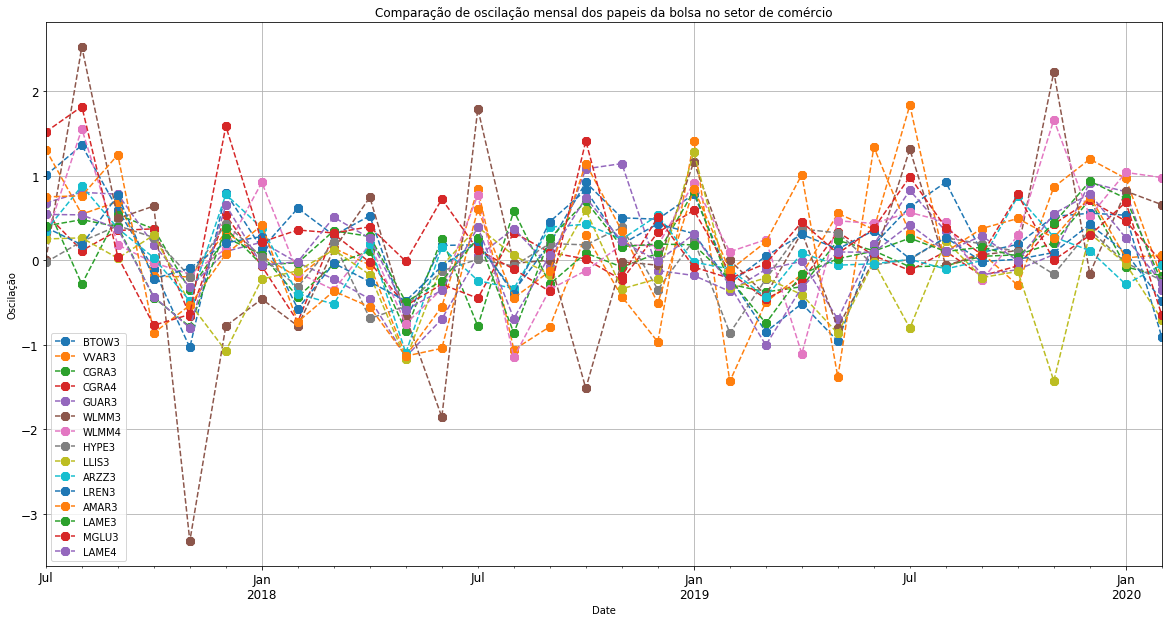

In [27]:
plt.figure(figsize=(20,10))
for papel in paper_comercio:
    df_final_oscilacao_month[papel].plot(label=papel,
                            style='8--', 
                            mark_right=True,
                            marker = "8",
                            grid=True,
                            markersize =8, 
                            fontsize=12)
    #df_final['VVAR3'].plot()
    
plt.ylabel('Oscilação')
plt.xlabel('Date')
plt.legend(loc="best")
plt.title('Comparação de oscilação mensal dos papeis da bolsa no setor de comércio')
plt.show()

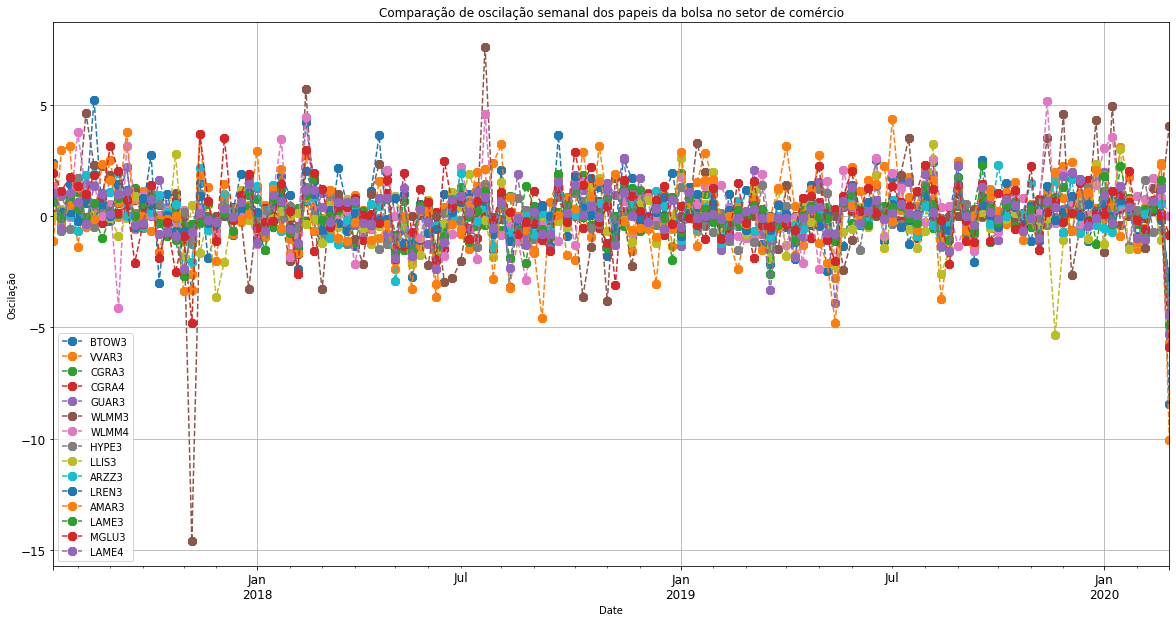

In [28]:
plt.figure(figsize=(20,10))
for papel in paper_comercio:
    df_final_oscilacao_week[papel].plot(label=papel,
                            style='8--', 
                            mark_right=True,
                            marker = "8",
                            grid=True,
                            markersize =8, 
                            fontsize=12)
    #df_final['VVAR3'].plot()
    
plt.ylabel('Oscilação')
plt.xlabel('Date')
plt.legend(loc="best")
plt.title('Comparação de oscilação semanal dos papeis da bolsa no setor de comércio')
plt.show()

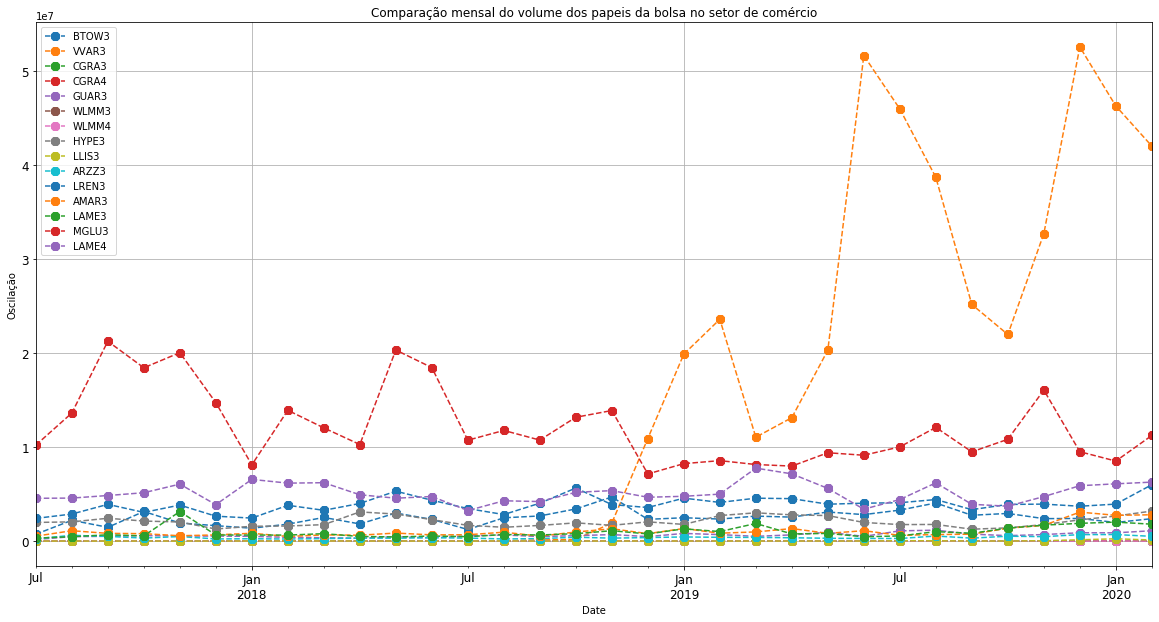

In [29]:
plt.figure(figsize=(20,10))
for papel in paper_comercio:
    df_final_volume_month[papel].plot(label=papel,
                            style='8--', 
                            mark_right=True,
                            marker = "8",
                            grid=True,
                            markersize =8, 
                            fontsize=12)
    #df_final['VVAR3'].plot()
    
plt.ylabel('Oscilação')
plt.xlabel('Date')
plt.legend(loc="best")
plt.title('Comparação mensal do volume dos papeis da bolsa no setor de comércio')
plt.show()

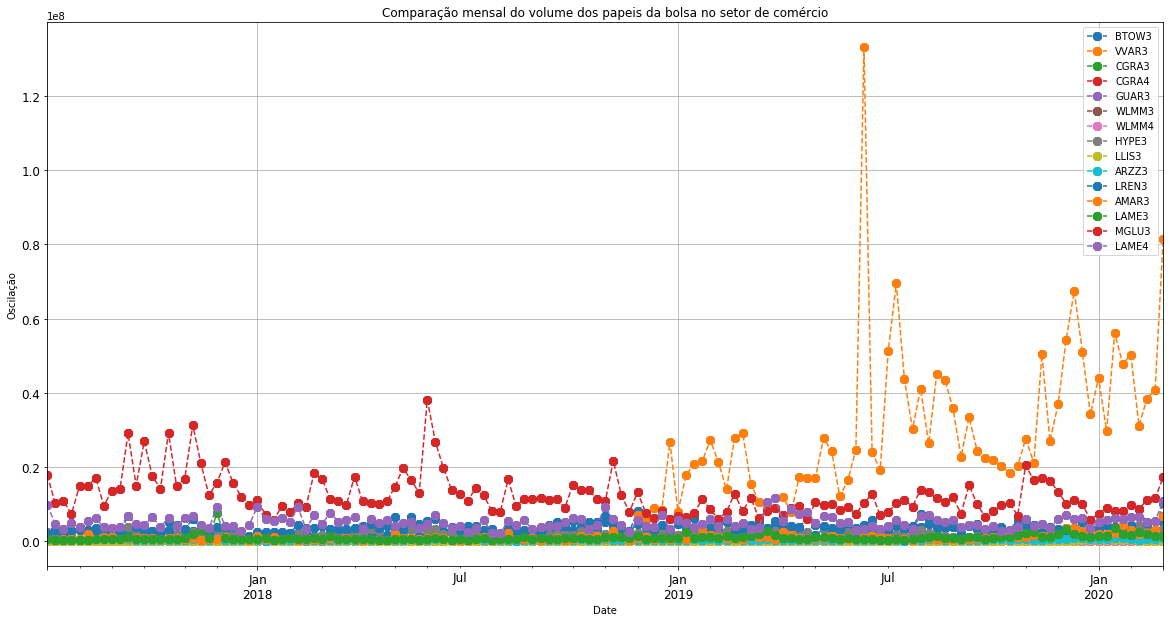

In [30]:
plt.figure(figsize=(20,10))
for papel in paper_comercio:
    df_final_volume_week[papel].plot(label=papel,
                            style='8--', 
                            mark_right=True,
                            marker = "8",
                            grid=True,
                            markersize =8, 
                            fontsize=12)
    #df_final['VVAR3'].plot()
    
plt.ylabel('Oscilação')
plt.xlabel('Date')
plt.legend(loc="best")
plt.title('Comparação mensal do volume dos papeis da bolsa no setor de comércio')
plt.show()

In [31]:
df_final_oscilacao_month.to_csv('../../../data/miner/osc_month_comercio_bolsa17-20.csv')
df_final_oscilacao_week.to_csv('../../../data/miner/osc_week_comercio_bolsa17-20.csv')

In [32]:
df_final_volume_month.to_csv('../../../data/miner/vol_month_comercio_bolsa17-20.csv')
df_final_volume_week.to_csv('../../../data/miner/vol_week_comercio_bolsa17-20.csv')